In [1]:
#Nous voulons prédire une variable binaire - que le salaire soit faible ou élevé.
#Calculez le salaire médian et créez une nouvelle variable binaire qui est vraie lorsque le salaire est élevé
#(au-dessus de la médiane)
#Nous pourrions également effectuer une régression linéaire (ou toute régression) pour prédire la valeur du salaire ici.


import numpy as np
import pandas as pd

In [2]:
data = pd.read_csv('/Users/charleshajjar/Desktop/projet_indeed_charles/clean_salary_charles.csv')

In [3]:
#calcule de la médiane
median = np.median(data.avg)
median

2355.0

In [4]:
data['dumsal'] = (data["avg"] >= data["avg"].median()).astype(int)

In [5]:
data.head()
#data.drop(['Summaries'], axis=1)

,Unnamed: 0,Titre,Company,Summaries,avg,cityfrance,city,dumsal
0,0,Alternance - Data Scientist H/F,Malakoff Humanis,Nous recherchons un business data analyst pass...,1125.0,['Paris (75)'],Paris (75),0
1,1,Data Scientist H/F,CCM Benchmark Group,La réalisation d'analyses de data mining répon...,1500.0,['Asnières-sur-Seine (92)'],Asnières-sur-Seine (92),0
2,4,Alternance - Assistant Data Analyst/PMO H/F,Gandi,"Euro Information, filiale Informatique du grou...",1125.0,['Paris (75)'],Paris (75),0
3,5,Développeur confirmé H/F,VONA,Business Developer – Stage de fin d’études – J...,800.0,['Levallois-Perret (92)'],Levallois-Perret (92),0
4,6,Data Analyst·(e) - Stagiaire H/F,Joko,Stagiaire data analyst(e) h/f ou similaire: 1 ...,3150.0,['Paris 9e (75)'],Paris 9e (75),1


In [6]:
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.model_selection import cross_val_score, cross_val_predict
from sklearn import metrics
from sklearn.model_selection import train_test_split
from sklearn import linear_model
from sklearn.linear_model import LogisticRegression
from sklearn.feature_extraction.text import CountVectorizer

In [7]:
cvec = CountVectorizer()
X = data["Titre"]
y = data["dumsal"]
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33)

In [8]:
#La gestion des fréquences, sélection des mots pertinents, élimination des stopwords
cvec = CountVectorizer(stop_words='english').fit(X_train)
df_train = pd.DataFrame(cvec.transform(X_train).todense(),
             columns=cvec.get_feature_names())

In [9]:
df_test = pd.DataFrame(cvec.transform(X_test).todense(),
                      columns=cvec.get_feature_names())
print(df_train.shape)
print(y_train.shape)
print(df_test.shape)
print(y_test.shape)

(192, 151)
(192,)
(95, 151)
(95,)


In [10]:
df_train.head(5)

,2020,67,68,affaires,agile,alfresco,alternance,alternant,analyst,analyste,...,trader,trafic,travail,télé,télécom,user,web,webmarketeur,éditique,études
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1
1,0,0,0,0,0,0,0,1,1,0,...,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [11]:
df_train.columns

Index(['2020', '67', '68', 'affaires', 'agile', 'alfresco', 'alternance',
       'alternant', 'analyst', 'analyste',
       ...
       'trader', 'trafic', 'travail', 'télé', 'télécom', 'user', 'web',
       'webmarketeur', 'éditique', 'études'],
      dtype='object', length=151)

In [12]:
lr = LogisticRegression()
lr.fit(df_train, y_train)
lr.score(df_test, y_test)

0.4421052631578947

In [13]:
#from sklearn.cross_validation import cross_val_score, cross_val_predict
from sklearn import metrics
# Perform 6-fold cross validation
scores = cross_val_score(lr, df_test, y_test, cv=6)
print("Cross-validated scores:", scores)
# Make cross validated predictions
predictions = cross_val_predict(lr, df_test, y_test, cv=6)
accuracy = metrics.accuracy_score(y_test, predictions)
print("Cross-Predicted Accuracy:", accuracy)

Cross-validated scores: [0.75       0.625      0.625      0.5625     0.375      0.66666667]
Cross-Predicted Accuracy: 0.6


In [14]:
from sklearn.ensemble import RandomForestClassifier
rf = RandomForestClassifier(class_weight='balanced')
RF = rf.fit(df_train,y_train)
s = cross_val_score(rf, df_train, y_train, n_jobs=-1)
print ("{} Score:\t{:0.3} ± {:0.3}".format("Random Forrest", s.mean().round(3), s.std().round(3)))

Random Forrest Score:	0.505 ± 0.072


In [15]:
rf_features = pd.DataFrame(RF.feature_importances_,
                                   index = df_train.columns,
                                    columns=['importance']).sort_values('importance',
                                                                        ascending=False)
rf_features.head(10)

,importance
consultant,0.035282
alternance,0.031020
junior,0.026269
data,0.022814
net,0.022592
nodejs,0.022178
informatique,0.021795
web,0.021779
analyst,0.019022
scientist,0.018004


In [16]:
#créé des colone par titre de travaille 
dummys= pd.get_dummies(data['Titre'])
dummys.head(5)

,(ALTERNANCE) Développeur Frontend - Chez l’un de nos partenaires,(ALTERNANCE) Développeur Java - Chez l’un de nos partenaires,(ALTERNANCE) Développeur PHP/Symfony - Chez l’un de nos partenaires,(ALTERNANCE) Développeur Python - Chez l’un de nos partenaires,(ALTERNANCE) Développeur Web - Chez l’un de nos partenaires,ALSA EMS - Alternance/Stage - Data Intelligence Specialist H/F,ANALYSTE CONTRÔLE QUALITÉ CODE SOURCE (H/F),ANALYSTE CONTRÔLE QUALITÉ CODE SOURCE F/H,ATTACHE COMMERCIAL – SUD-EST H/F,Alternance - Assistant Data Analyst/PMO H/F,...,Responsable de centre de profit en création (H/F),Senior Business Analyst H/F,Stage - Data Analyst (F/H),Stagiaire Data Scientist,Stagiaire Data Scientist – Economic Advisory (H/F),Stagiaire Opinion Data Analyst,Technico-Commercial h/f,UN ALTERNANT – DATA ANALYST (H/F),Un développeur Java JEE/Angular sur Nancy / Freelance,Webmarketeur – Développeur multimédia h/f - Alternance
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,1,...,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [17]:
import pandas as pd
from IPython.display import Markdown, display
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt
from sklearn.metrics import roc_curve, auc
import numpy as np
from sklearn import metrics    
from sklearn.linear_model import LogisticRegression
from sklearn import svm
from sklearn import tree
from sklearn.ensemble import RandomForestClassifier
from sklearn.neural_network import MLPClassifier
from sklearn.ensemble import AdaBoostClassifier
from sklearn.model_selection import cross_val_score
from sklearn.metrics import accuracy_score
from sklearn.metrics import roc_curve, auc
from sklearn.preprocessing import label_binarize

In [18]:
dummys_city= pd.get_dummies(data['city'])
dummys_city.head(5)
data= pd.concat([data,dummys], axis=1)
data.head(5)
data= pd.concat([data,dummys_city], axis=1)
data.drop(columns = ['Unnamed: 0', 'Titre','Company','cityfrance','city'], inplace = True)
data.drop(columns = ['Summaries'], inplace = True)
data.head(5)


,avg,dumsal,(ALTERNANCE) Développeur Frontend - Chez l’un de nos partenaires,(ALTERNANCE) Développeur Java - Chez l’un de nos partenaires,(ALTERNANCE) Développeur PHP/Symfony - Chez l’un de nos partenaires,(ALTERNANCE) Développeur Python - Chez l’un de nos partenaires,(ALTERNANCE) Développeur Web - Chez l’un de nos partenaires,ALSA EMS - Alternance/Stage - Data Intelligence Specialist H/F,ANALYSTE CONTRÔLE QUALITÉ CODE SOURCE (H/F),ANALYSTE CONTRÔLE QUALITÉ CODE SOURCE F/H,...,Mérignac (33),Nancy (54),Noisy-le-Sec (93),Paris (75),Paris 18e (75),Paris 2e (75),Paris 9e (75),Rueil-Malmaison (92),Tassin-la-Demi-Lune (69),Île-de-France
0,1125.0,0,0,0,0,0,0,0,0,0,...,0,0,0,1,0,0,0,0,0,0
1,1500.0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,1125.0,0,0,0,0,0,0,0,0,0,...,0,0,0,1,0,0,0,0,0,0
3,800.0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,3150.0,1,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,1,0,0,0


In [26]:
y=data['avg']
X=data.drop(['avg'], axis=1)
#X= pd.get_dummies(X.select_dtypes('object'))
#X1 = X.select_dtypes(exclude = 'object')
#X = pd.concat([X1, X], axis=1, join='inner')


In [27]:
X.head(5)
y.head(5)

0    1125.0
1    1500.0
2    1125.0
3     800.0
4    3150.0
Name: avg, dtype: float64

In [28]:
# Train - Test split
train_data, test_data, train_label, test_label = train_test_split(X, y, test_size  = 0.25)

In [29]:
import pandas as pd
import xgboost as xgb
from sklearn.datasets import load_boston
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error

In [52]:
regressor = xgb.XGBRegressor(
    n_estimators=163,
    reg_lambda=1,
    gamma=0,
    max_depth=163
)

In [53]:
regressor.fit(train_data, train_label)

[17:28:18] WARNING: src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


XGBRegressor(base_score=0.5, booster='gbtree', colsample_bylevel=1,
             colsample_bynode=1, colsample_bytree=1, gamma=0,
             importance_type='gain', learning_rate=0.1, max_delta_step=0,
             max_depth=163, min_child_weight=1, missing=None, n_estimators=163,
             n_jobs=1, nthread=None, objective='reg:linear', random_state=0,
             reg_alpha=0, reg_lambda=1, scale_pos_weight=1, seed=None,
             silent=None, subsample=1, verbosity=1)

In [54]:
pd.DataFrame(regressor.feature_importances_.reshape(1, -1))

,0,1,2,3,4,5,6,7,8,9,...,153,154,155,156,157,158,159,160,161,162
0,0.177348,0.001487,0.002233,0.005844,0.000049,0.007823,0.022335,0.0,0.00002,0.0,...,0.001307,0.006856,0.0,6.841466e-10,0.010459,0.000289,0.001668,0.0,0.000006,0.0


In [55]:
y_pred = regressor.predict(test_data)

In [56]:
mean_squared_error(test_label, y_pred)

348714.7137936787

In [57]:
print("Score Train -->", round(regressor.score(test_data, y_pred) *100,2), " %")


Score Train --> 100.0  %


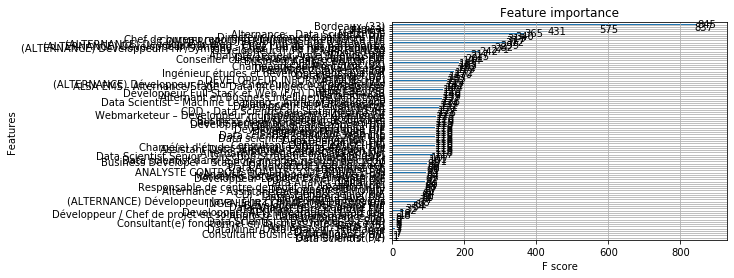

In [58]:
xgb.plot_importance(regressor)


In [59]:
print(y_pred,test_label)

[3734.3948 2099.9995 2099.9778 2877.468  3586.9497 2825.7493 2137.4368
 3612.6877 2354.9993 3399.9895 2354.9724 2354.9817 2861.4583 2099.9995
 2099.7725 3399.9895 2354.9998 2100.021  2978.1863 2100.017  3399.9895
 2633.4978 2099.9949 2099.7715 2100.021  3020.3376 3399.9895 2099.998
 2099.7769 2978.1863 2832.5012 2169.7632 2355.9849 2703.3318 3399.9895
 2099.997  2354.9897 3399.9895 2100.1045 2100.198  2099.9993 2099.999
 2849.9978 2929.2874 1599.9991 2099.985  2099.999  3399.9895 2099.9993
 2364.539  2099.982  2101.58   2099.9976 2861.4583 2354.9976 2977.4846
 2099.999  3399.9895 2099.773  3399.9895 3399.9895 2633.4978 2354.9998
 3399.855  2703.3318  550.8764 3586.9497 2354.9988 2274.3315 2099.9993
 2849.9978 2099.9993] 24     3736.0
166    2100.0
181    2100.0
221    2850.0
237    3400.0
        ...  
109    2355.0
7      1125.0
90     2100.0
280    2850.0
121    2100.0
Name: avg, Length: 72, dtype: float64


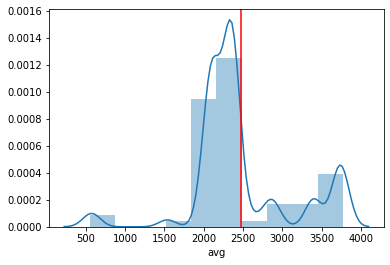

In [101]:
import seaborn as sns
import matplotlib.pyplot as plt
ax = sns.distplot(test_label, bins=10)
ax.axvline(test_label.mean(), c='r')


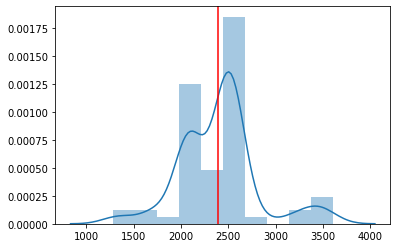

In [102]:
import seaborn as sns
import matplotlib.pyplot as plt
ax = sns.distplot(y_pred, bins=10)
ax.axvline(y_pred.mean(), c='r')


In [68]:


# Normalization
from sklearn.preprocessing import StandardScaler  
scaler = StandardScaler()  

# Fitting only on training data
scaler.fit(train_data)  
train_data = scaler.transform(train_data)  

# Applying same transformation to test data
test_data = scaler.transform(test_data)

In [38]:
# Simple example for beginers how to adress ""
import numpy as np
from sklearn                        import metrics, svm
from sklearn.linear_model           import LogisticRegression
from sklearn import preprocessing
from sklearn import utils


In [39]:
#entrainement du modèle
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error
 
lmodellineaire = LinearRegression()
lmodellineaire.fit(train_data, train_label)


LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [40]:
# Evaluation du training set
from sklearn.metrics import r2_score
y_test_predict = lmodellineaire.predict(test_data)
rmse = (np.sqrt(mean_squared_error(test_label, y_test_predict)))
r2 = r2_score(test_label, y_test_predict)
 
print('La performance du modèle sur la base dapprentissage')
print('--------------------------------------')
print('Lerreur quadratique moyenne est {}'.format(rmse))
print('le score R2 est {}'.format(r2))
print('\n')

La performance du modèle sur la base dapprentissage
--------------------------------------
Lerreur quadratique moyenne est 8.078263602042472e+16
le score R2 est -1.543012403858409e+28




In [24]:
print(data.Titre.value_counts())

(ALTERNANCE) Développeur Python - Chez l’un de nos partenaires         10
Développeur Full Stack et Web (F/H) DW-PRE-NA158                       10
Développeur (F/H) DEV-PRE-PNL80                                        10
Développeur Java Alfresco                                               9
(ALTERNANCE) Développeur PHP/Symfony - Chez l’un de nos partenaires     9
                                                                       ..
MEDIA TRADER /DATA ANALYST F/H                                          1
Senior Business Analyst H/F                                             1
Consultant Data Scientist (H/F)                                         1
ANALYSTE CONTRÔLE QUALITÉ CODE SOURCE (H/F)                             1
Data Scientist – Machine Learning – Artificial Intelligence             1
Name: Titre, Length: 139, dtype: int64


In [25]:
print(data.Company.value_counts())

OpenClassrooms              52
HAYS                        20
Premista                    15
Pharmagest                  10
CCM Benchmark Group          9
                            ..
Delta Security Solutions     1
Berger-Levrault              1
Alptis                       1
MGEN                         1
Distributeur Indépendant     1
Name: Company, Length: 115, dtype: int64


In [27]:
data.city.value_counts()[0:30]


France                         87
Bordeaux (33)                  54
Metz (57)                      26
Tassin-la-Demi-Lune (69)       14
Nancy (54)                     11
Craponne (69)                  11
Levallois-Perret (92)          11
Brignais (69)                  10
Paris 9e (75)                   8
Paris (75)                      8
Lozanne (69)                    7
Lyon 9e (69)                    6
Champagne-au-Mont-d'Or (69)     5
Mérignac (33)                   5
Paris 2e (75)                   5
Lyon (69)                       5
Gennevilliers (92)              3
Asnières-sur-Seine (92)         3
Paris 18e (75)                  2
Rueil-Malmaison (92)            2
Châtillon (92)                  2
Noisy-le-Sec (93)               1
Île-de-France                   1
Name: city, dtype: int64

In [32]:
data.groupby('Titre')['avg'].value_counts()


Titre                                                             avg   
(ALTERNANCE) Développeur Frontend - Chez l’un de nos partenaires  2100.0    4
                                                                  2355.0    4
                                                                  2850.0    1
(ALTERNANCE) Développeur Java - Chez l’un de nos partenaires      2355.0    3
                                                                  2100.0    2
                                                                           ..
UN ALTERNANT – DATA ANALYST (H/F)                                 3400.0    1
Un développeur Java JEE/Angular sur Nancy / Freelance             2355.0    1
Webmarketeur – Développeur multimédia h/f - Alternance            2100.0    3
                                                                  2355.0    2
                                                                  2650.0    1
Name: avg, Length: 211, dtype: int64